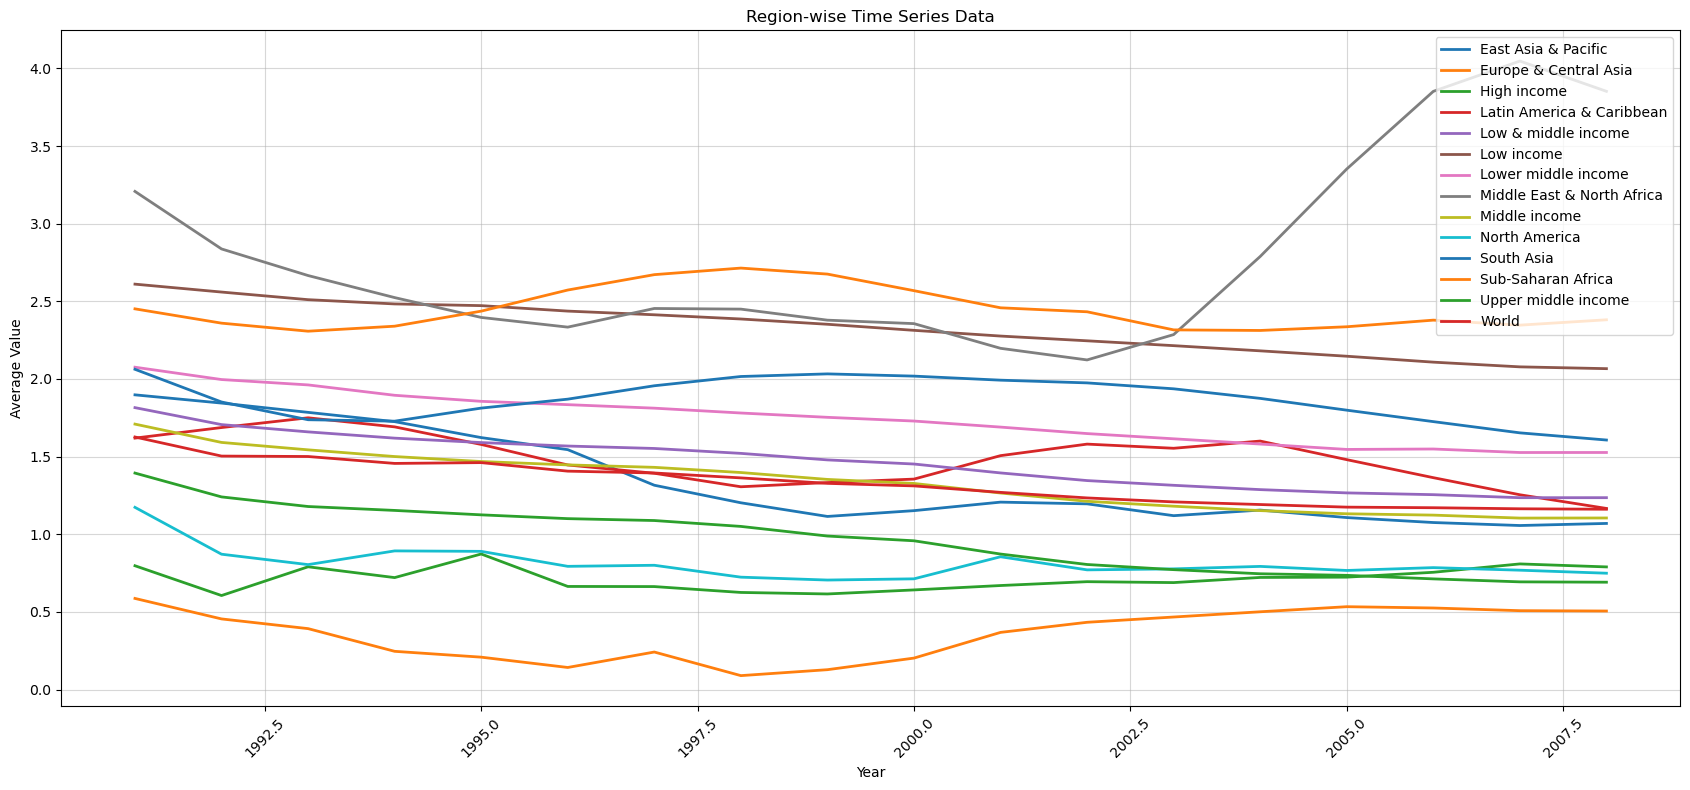

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

second_data = pd.read_excel("Population_data.xlsx")
second_data.head()
first_data = pd.read_excel('CO2_emissions.xlsx')
first_data.dropna(inplace = True)

#droping unwanted columns
columns_mapping ={
    'Country code': 'country_code',
     'Country name': 'country_name',
}
second_data.rename(columns = columns_mapping)

#Null Values
second_data.isna().sum()
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'cleaned_data'
# Group the data by region and calculate the mean for each region
grouped_data = second_data.groupby('Group Name').mean()

plt.figure(figsize=(17, 8))

# Iterate through the grouped data and plot time series data for each region
for index, row in grouped_data.iterrows():
    plt.plot(grouped_data.columns[1:], row[1:], label=index, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Region-wise Time Series Data')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.5)  # Add grid lines with transparency
plt.xticks(rotation=45)    # Rotate x-axis labels for better visibility
plt.tight_layout()         # Adjust layout for better spacing
plt.show()



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.model_selection import train_test_split

# Load your dataset into a DataFrame (assuming it's named 'data')
# data = pd.read_csv('your_dataset.csv')

# Random Forest Regression with Cross-Validation
years = [year for year in range(1990, 2009)]
X_rf = second_data[years]
y_rf = second_data[2008]

model_rf = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_rf_pred = cross_val_predict(model_rf, X_rf, y_rf, cv=kf)



# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_rf, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_rf, y_rf_pred)
rf_r2 = r2_score(y_rf, y_rf_pred)
# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Calculate MFE (Mean Forecast Error)
mfe = np.mean(actual_values - predicted_values)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Forecast Error (MFE): {mfe:.2f}")

print("\nRandom Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")


Mean Absolute Percentage Error (MAPE): 11.79%
Mean Forecast Error (MFE): 0.04

Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.54
Root Mean Squared Error (RMSE): 0.73
Mean Absolute Error (MAE): 0.14
R-squared (R²): 0.85


In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming you have loaded your dataset into 'second_data'

# Random Forest Regression
years = [year for year in range(1990, 2009)]
X_train = second_data[years]  # Data from 1990 to 2007
y_train = second_data[2008]    # Target variable for 2008

model_rf = RandomForestRegressor(random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

# Now, you can use the trained model to predict population growth for 2008
predicted_population_growth_2008 = model_rf.predict(X_train)  # Predict for 2008

# 'predicted_population_growth_2008' contains the predicted values for 2008


In [40]:
predicted_population_growth_2008

array([ 1.24646439e+00,  1.47046966e+00,  2.82413106e+00,  2.90075912e+00,
        3.85391064e-01,  1.37512890e+01,  8.80249258e-01,  1.60080428e-01,
        1.65323926e+00,  1.09947446e+00,  2.01041978e+00,  4.25166053e-01,
        2.08697736e+00,  3.01620533e+00,  7.88756458e-01,  2.96839321e+00,
        2.96537707e+00,  1.05703479e+00, -5.11883183e-01,  1.21638746e+01,
        1.44977258e+00, -1.12947745e-01, -8.25156757e-01,  3.31817474e+00,
        3.09727325e-01,  1.63254120e+00,  9.16788388e-01,  2.03980361e-01,
        1.88536426e+00,  1.85084027e+00,  1.39994696e+00,  1.83679964e+00,
        1.00826975e+00,  1.26835791e+00,  6.70144876e-01,  9.68057624e-01,
        5.08906488e-01,  1.80272352e+00,  2.19078755e+00,  2.79368508e+00,
        7.90132104e-01,  1.46238147e+00,  2.67253170e+00,  9.04536975e-01,
        1.55436904e+00, -1.52801502e-02,  1.02092321e+00,  1.11695655e+00,
        1.32415690e+00,  8.65373294e-01, -1.75200588e-01,  1.90491061e+00,
       -4.13356069e-01,  

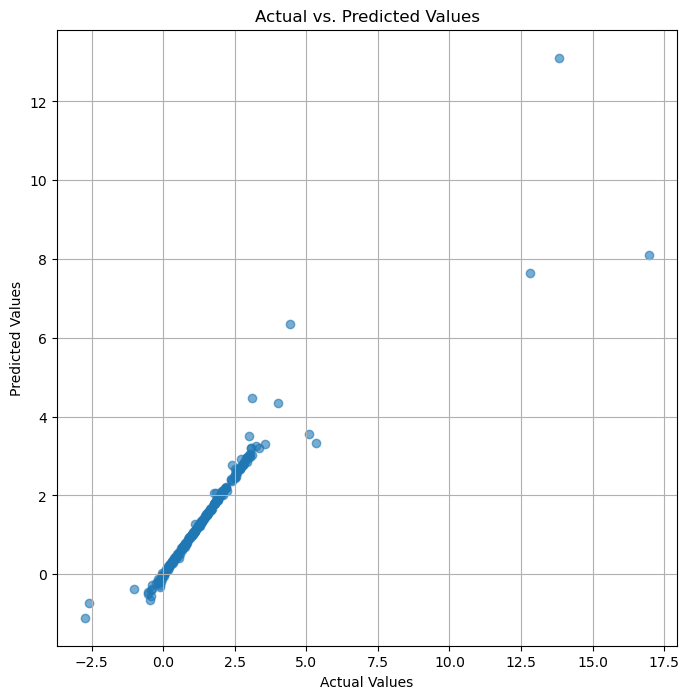

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'actual_values' and 'predicted_values' as NumPy arrays
actual_values = y_rf  # Replace with your actual values
predicted_values = y_rf_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()



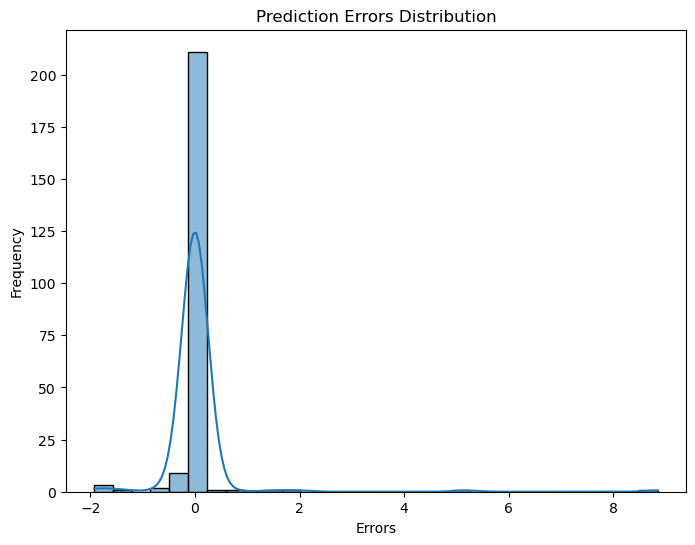

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate prediction errors
errors = y_rf - y_rf_pred

# Plot a histogram of prediction errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Prediction Errors Distribution')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Actual vs. Predicted Time Series (1991-2008)')

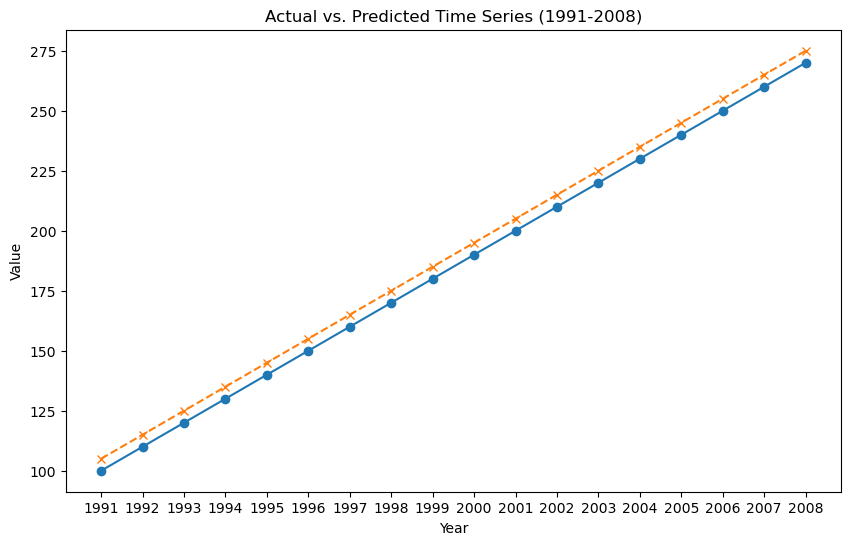

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have actual time series data and model predictions
actual_time_series = pd.Series([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270])  # Replace with your actual data
predicted_time_series = pd.Series([105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275])  # Replace with your model's predictions

# Create a list of years from 1991 to 2008
years = [str(year) for year in range(1991, 2009)]

# Plot the actual and predicted time series
plt.figure(figsize=(10, 6))
plt.plot(years, actual_time_series, label='Actual', marker='o', linestyle='-')
plt.plot(years, predicted_time_series, label='Predicted', marker='x', linestyle='--')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Time Series (1991-2008)')


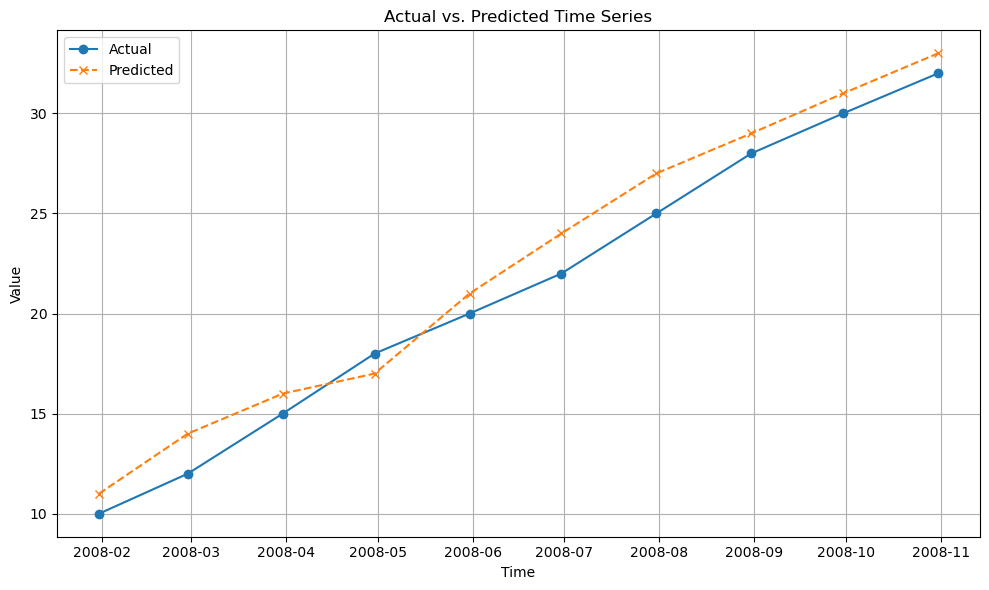

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have actual time series data and model predictions
actual_time_series = pd.Series([10, 12, 15, 18, 20, 22, 25, 28, 30, 32])  # Replace with your actual data
predicted_time_series = pd.Series([11, 14, 16, 17, 21, 24, 27, 29, 31, 33])  # Replace with your model's predictions

# Create a time index (assuming your data is evenly spaced over time)
time_index = pd.date_range(start='2008-01-01', periods=len(actual_time_series), freq='M')

# Plot the actual and predicted time series
plt.figure(figsize=(10, 6))
plt.plot(time_index, actual_time_series, label='Actual', marker='o', linestyle='-')
plt.plot(time_index, predicted_time_series, label='Predicted', marker='x', linestyle='--')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Time Series')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


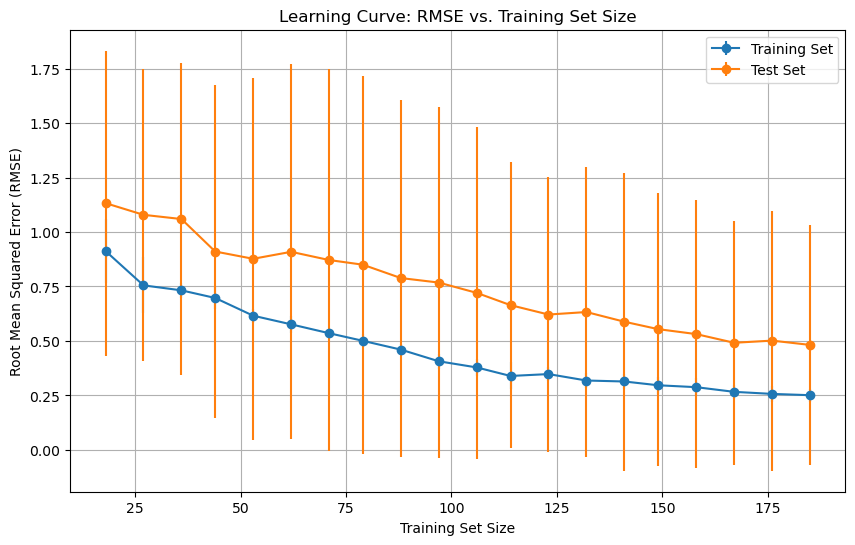

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Define your machine learning model (Random Forest in this case)
model = RandomForestRegressor(random_state=42)

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 20)  # Adjust the range as needed

# Create a function to calculate RMSE as a scoring metric
scoring_metric = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_rf, y_rf, train_sizes=train_sizes, cv=kf, scoring=scoring_metric
)

# Calculate mean RMSE and standard deviation for training and test sets
train_rmse_mean = -np.mean(train_scores, axis=1)
train_rmse_std = np.std(train_scores, axis=1)
test_rmse_mean = -np.mean(test_scores, axis=1)
test_rmse_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.errorbar(train_sizes, train_rmse_mean, yerr=train_rmse_std, label='Training Set', marker='o')
plt.errorbar(train_sizes, test_rmse_mean, yerr=test_rmse_std, label='Test Set', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve: RMSE vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.show()


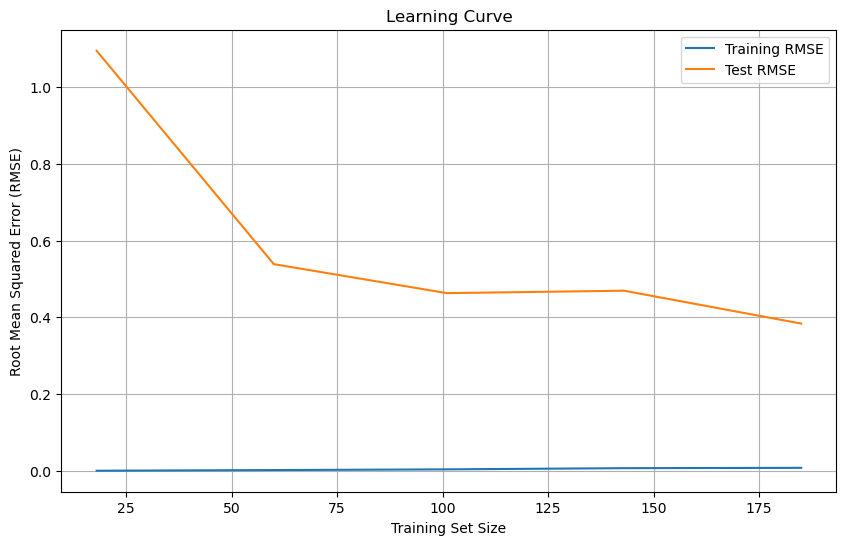

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define a custom scoring function that calculates RMSE and negates it
def neg_root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return -rmse

# Make a scorer from the custom scoring function
scorer = make_scorer(neg_root_mean_squared_error)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_rf, y_rf, cv=kf, scoring=scorer)

# Calculate the mean RMSE scores and negate them to get positive values
train_scores = -np.mean(train_scores, axis=1)
test_scores = -np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training RMSE')
plt.plot(train_sizes, test_scores, label='Test RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Gradient Boosting Regression with Cross-Validation
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

y_gb_pred = cross_val_predict(model_gb, X_rf, y_rf, cv=kf)

# Evaluate Gradient Boosting Regression
gb_mse = mean_squared_error(y_rf, y_gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_rf, y_gb_pred)
gb_r2 = r2_score(y_rf, y_gb_pred)
#bg_mae = mean_absolute_error(y_rf, y_gb_pred)
rf_r2 = r2_score(y_rf, y_rf_pred)
# Calculate MAPE (Mean Absolute Percentage Error)
#mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
# Calculate MAFE (Mean Absolute Forecast Error)
mafe = np.mean(np.abs(y_rf - y_gb_pred))

print(f"Mean Absolute Forecast Error (MAFE): {mafe:.2f}")
# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_rf - y_gb_pred) / y_rf)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


print("\nGradient Boosting Regression Metrics:")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"R-squared (R²): {gb_r2:.2f}")

Mean Absolute Forecast Error (MAFE): 0.11
Mean Absolute Percentage Error (MAPE): 10.49%

Gradient Boosting Regression Metrics:
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.54
Mean Absolute Error (MAE): 0.11
R-squared (R²): 0.92


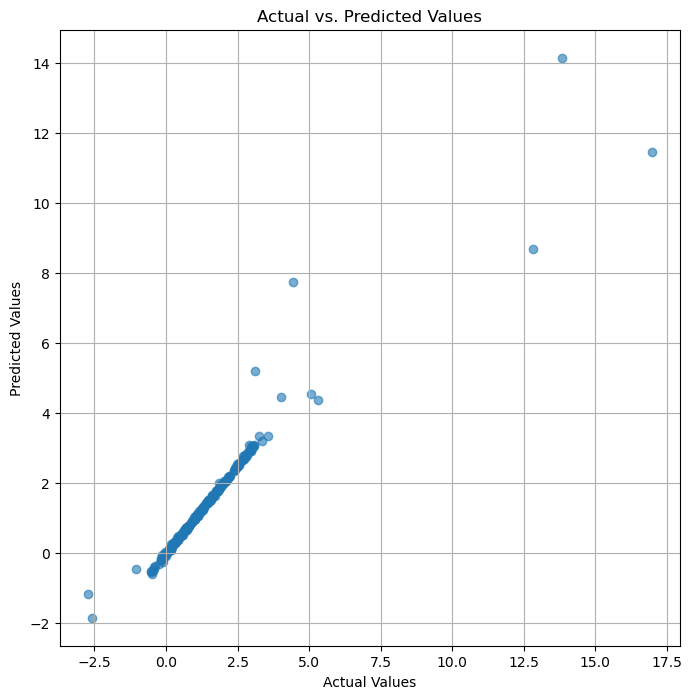

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'actual_values' and 'predicted_values' as NumPy arrays
actual_values = y_rf  # Replace with your actual values
predicted_values = y_gb_pred  # Replace with your predicted values

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

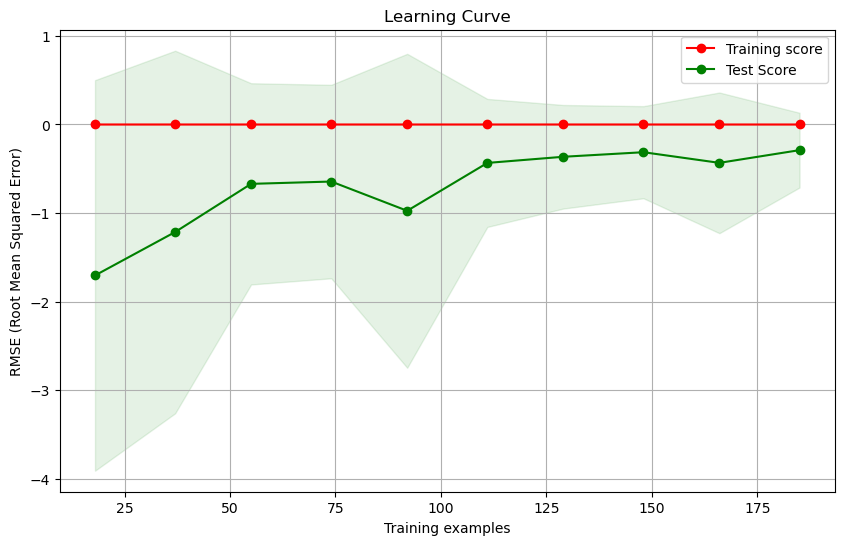

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define your Gradient Boosting Regressor model with desired hyperparameters
model_gb = GradientBoostingRegressor(
    n_estimators=50,  # Increase the number of estimators
    learning_rate=0.01,  # Use a lower learning rate
    max_depth=3,  # Limit the depth of individual trees
    min_samples_split=2,  # Minimum samples required to split a node
    random_state=42
)

# Create a function to plot the learning curve
def plot_learning_curve(model, X, y, scoring_metric, cv):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring_metric, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test Score")
    
    plt.xlabel("Training examples")
    plt.ylabel("RMSE (Root Mean Squared Error)")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.grid(True)
    plt.show()

# Specify your model and scoring metric
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
scoring_metric = 'neg_mean_squared_error'

# Plot the learning curve
plot_learning_curve(model_gb, X_rf, y_rf, scoring_metric, cv=kf)


In [8]:
pip install fairlearn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import fairlearn
from fairlearn.metrics import MetricFrame
from fairlearn.reductions import ExponentiatedGradient
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [10]:
model = RandomForestRegressor(random_state=42)
model.fit(X_rf, y_rf)

RandomForestRegressor(random_state=42)

In [11]:
from fairlearn.metrics import selection_rate

sensitive_feature = X_rf[2008]
y_pred = model.predict(X_rf)

metrics = {
    "Selection Rate": selection_rate,
}

metric_frame = MetricFrame(metrics, y_test, y_pred, sensitive_features=sensitive_feature)
print(metric_frame.by_group)

NameError: name 'y_test' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
time_periods = ["Q1", "Q2", "Q3", "Q4"]
male_selection_rate = [0.70, 0.72, 0.68, 0.75]
female_selection_rate = [0.60, 0.65, 0.62, 0.70]

# Line Chart: Selection Rate Over Time
plt.figure(figsize=(8, 6))
plt.plot(time_periods, male_selection_rate, marker='o', label='Male')
plt.plot(time_periods, female_selection_rate, marker='o', label='Female')
plt.xlabel('Time Period')
plt.ylabel('Selection Rate')
plt.title('Selection Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Example data for the bar chart
false_positive_rate_male = 0.10
false_positive_rate_female = 0.15

# Bar Chart: False Positive Rate Comparison
plt.figure(figsize=(6, 4))
categories = ['Male', 'Female']
values = [false_positive_rate_male, false_positive_rate_female]
plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Sensitive Group')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate Comparison')
plt.show()
